# Data Science and Visualization (RUC F2023)

## Lecture 7: Clustering I

 # Agglomerative Clustering
 
 We use the Age-Income data set from this book:
 
 Jay Gendron, Introduction to R for Business Intelligence, Packt Publishing Ltd., 2016
 

## 0. Importing the Required Libraries and Data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('C:/Data/Ch5_age_income_data.csv')
data.head()

,bin,age,income
0,60-69,64,87083.236510
1,30-39,33,76807.824635
2,20-29,24,12043.598766
3,30-39,33,61972.002432
4,70-79,78,60120.315192


## 1. Feature Selection

In [3]:
X = data[['age', 'income']]

In [9]:
X.values

array([[6.40000000e+01, 8.70832365e+04],
       [3.30000000e+01, 7.68078246e+04],
       [2.40000000e+01, 1.20435988e+04],
       ...,
       [2.40000000e+01, 3.03344684e+04],
       [2.10000000e+01, 5.03603419e+04],
       [5.40000000e+01, 9.15483574e+04]])

## 2. Model Building

In [56]:
from sklearn.cluster import AgglomerativeClustering

# Apply the agglomerative clustering algorithm, using 3 clusters
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

## 3. Clustering Result

In [57]:
assignment

array([0, 0, 2, ..., 2, 1, 0], dtype=int64)

In [58]:
len(assignment)

8105

## 4. Result Visualization

Text(0, 0.5, 'Income')

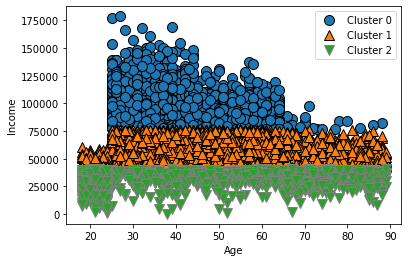

In [59]:
import matplotlib.pyplot as plt
import mglearn

# Plot the clusters
mglearn.discrete_scatter(X.values[:, 0], X.values[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")

plt.xlabel("Age")
plt.ylabel("Income")

## 5. Data Scaling Effect

In [61]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

Text(0, 0.5, 'Income')

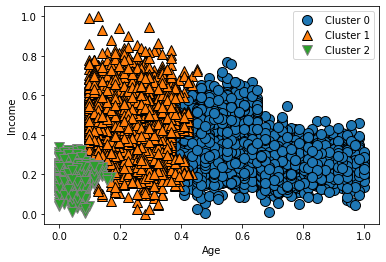

In [62]:
import matplotlib.pyplot as plt
import mglearn

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_scaled_mm)

# Plot the clusters
mglearn.discrete_scatter(X_scaled_mm.values[:, 0], X_scaled_mm.values[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")

plt.xlabel("Age")
plt.ylabel("Income")

## 6. Hierarchical Clustering Effect: Bottom-Up

We define the following function that 
* returns n clusters using AgglomerativeClustering and 
* visualizes the clustering result

In [51]:
def aggClustering(n):
    # Apply the agglomerative clustering algorithm, using n clusters
    agg = AgglomerativeClustering(n_clusters=n)
    assignment = agg.fit_predict(X_scaled_mm)

    plt.figure(figsize=(8, 6))
    # Plot the clusters
    mglearn.discrete_scatter(X_scaled_mm.values[:, 0], X_scaled_mm.values[:, 1], assignment)

    cluster_list = []
    for i in range(1, n+1):
        cluster_list.append('Cluster {0}'.format(i))
    plt.legend(cluster_list, loc="best")

    plt.xlabel("Age")
    plt.ylabel("Income")
    plt.title("Agglomerative clustering with {0} clusters".format(n))
    plt.show()

We call this function to show how 10 clusters are merged into fewer, finally a single cluster:

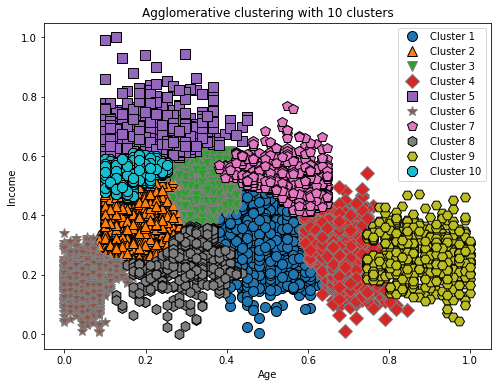

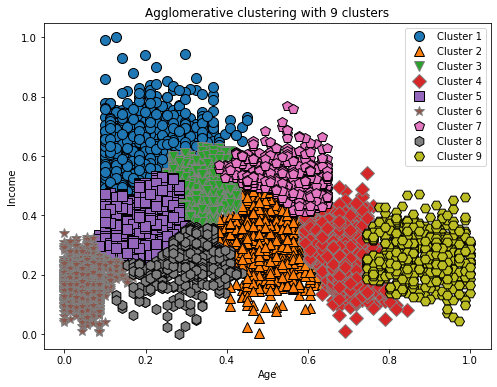

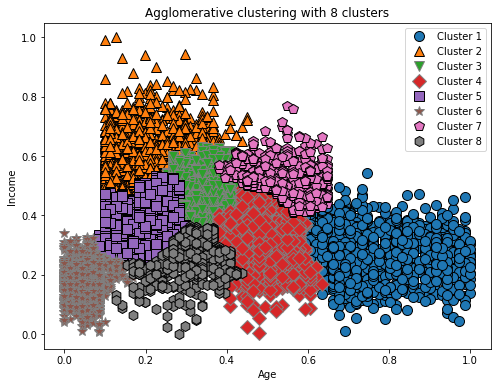

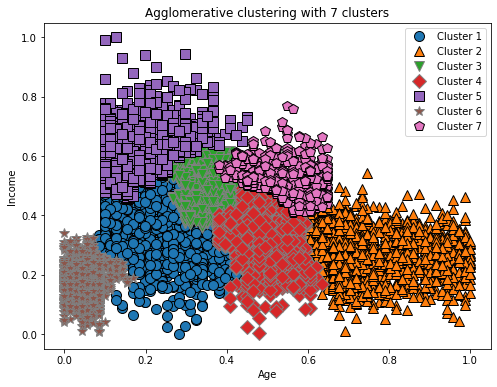

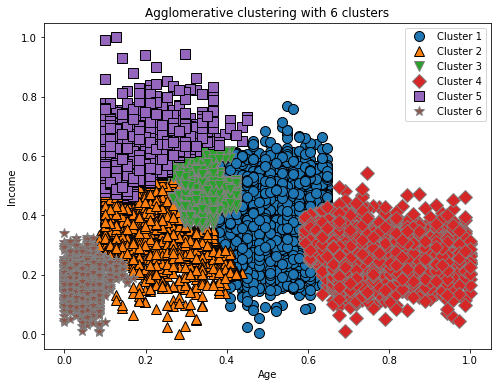

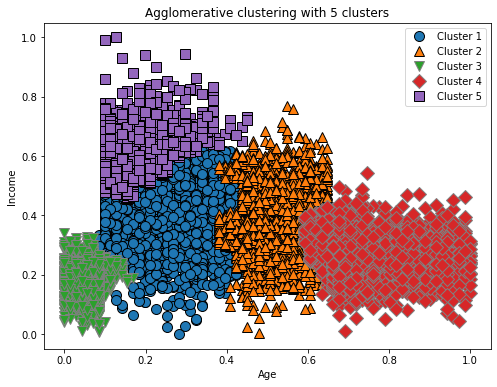

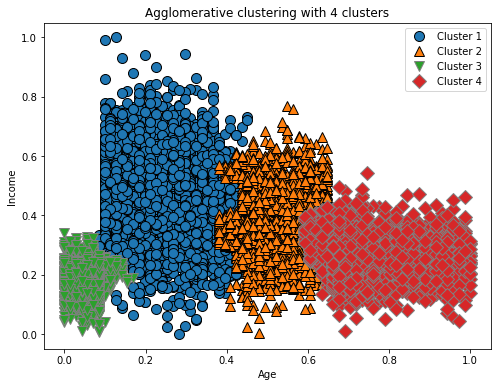

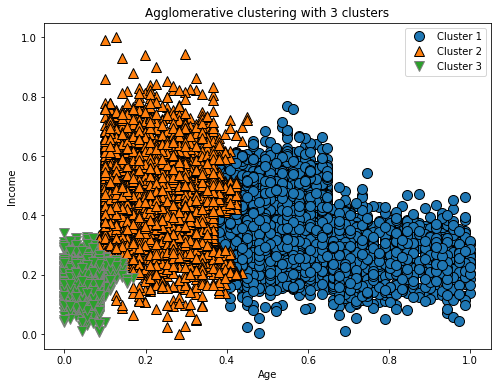

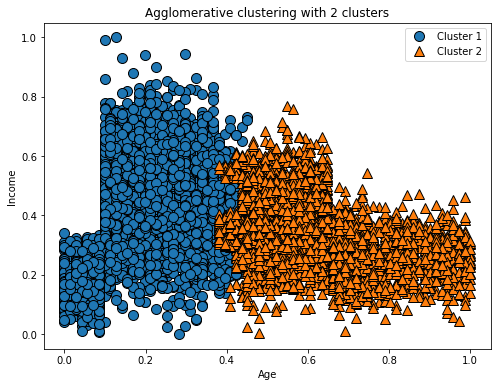

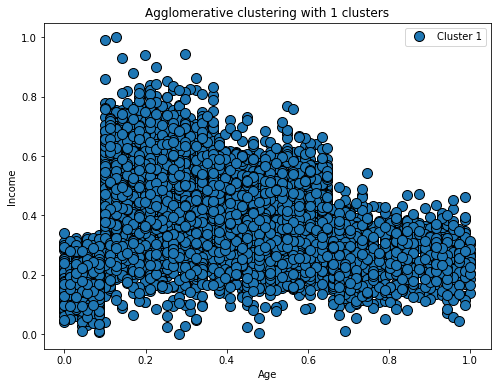

In [53]:
for cn in range(10, 0, -1):
    aggClustering(cn)